# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.2)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [6]:
def train_regressor_model(model, X, y):
    
    '''
        This function fit a model, and return evaluation of the model based on RMSE, MAE and R2 score.
        
        Parameters:
            model: Model that will be trained
            X: DataFrame for train the model
            y: Target
        Return:
            Results of the evaluations the model
            
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.2)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    r2_score_train = r2_score(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    r2_score_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    
    return print(f'''Model results:   
                                      Train r2_score: {r2_score_train}
                                      Train rmse: {rmse_train}
                                      Train mae: {mae_train}
                                      Test r2_score: {r2_score_test} 
                                      Test rmse: {rmse_test}
                                      Test mae: {mae_test}
                                      ''')
    

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [7]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()


## 3. Calculate and print R-squared for both the training and the testing set.

In [8]:
train_regressor_model(linreg, X, y)

Model results:   
                                      Train r2_score: 0.7508856358979673
                                      Train rmse: 4.6520331848801675
                                      Train mae: 3.314771626783228
                                      Test r2_score: 0.6687594935356278 
                                      Test rmse: 4.928602182665368
                                      Test mae: 3.1890919658878767
                                      


## 4. Calculate and print mean squared error for both the training and the testing set.

In [9]:
train_regressor_model(linreg, X, y)

Model results:   
                                      Train r2_score: 0.7508856358979673
                                      Train rmse: 4.6520331848801675
                                      Train mae: 3.314771626783228
                                      Test r2_score: 0.6687594935356278 
                                      Test rmse: 4.928602182665368
                                      Test mae: 3.1890919658878767
                                      


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [10]:
train_regressor_model(linreg, X, y)

Model results:   
                                      Train r2_score: 0.7508856358979673
                                      Train rmse: 4.6520331848801675
                                      Train mae: 3.314771626783228
                                      Test r2_score: 0.6687594935356278 
                                      Test rmse: 4.928602182665368
                                      Test mae: 3.1890919658878767
                                      


## Classification Model Evaluation

In [11]:
from sklearn.datasets import load_iris

data = load_iris()

X_c = pd.DataFrame(data["data"], columns=data["feature_names"])
y_c = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [16]:
#! pip install plotly

     ---------------------------------------- 15.2/15.2 MB 3.0 MB/s eta 0:00:00
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(8,8))
pd.options.plotting.backend = "plotly"
sns.set(rc={'figure.figsize':(6,6)});

<Figure size 576x576 with 0 Axes>

In [23]:
def train_classification_model(model, X, y):
    
    '''
        This function fit a model, and return evaluation of the model based on RMSE, MAE and R2 score.
        
        Parameters:
            model: Model that will be trained
            X: DataFrame for train the model
            y: Target
        Return:
            Results of the evaluations the model
            
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.2)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    bal_acc_train = balanced_accuracy_score(y_train, y_pred_train)
    bal_acc_test = balanced_accuracy_score(y_test, y_pred_test)
    prec_train = precision_score(y_train, y_pred_train, average='macro')
    prec_test = precision_score(y_test, y_pred_test, average='macro')
    rec_train = recall_score(y_train, y_pred_train, average='macro')
    rec_test = recall_score(y_test, y_pred_test, average='macro')
    f1_train = f1_score(y_train, y_pred_train, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    print(f'''Model results:   
                                      Train acc: {acc_train}
                                      Train balanced_acc: {bal_acc_train}
                                      Train precision: {prec_train}
                                      Train recall: {rec_train}
                                      Train F1: {f1_train}
                                      Test acc: {acc_test} 
                                      Test balanced: {bal_acc_test}
                                      Test precision: {prec_test}
                                      Test recall: {rec_test}
                                      Test F1: {f1_test}
                                      ''')
    print('\n ----- Confusion Matrix for Train -----\n')
    
    sns.heatmap(cm_train, annot=True)
    sns.set(rc={'figure.figsize':(8,8)})
    plt.title('Matriz confusion')
    plt.ylabel('Verdad')
    plt.xlabel('Prediccion')
    plt.show();
    
    print('\n ----- Confusion Matrix for Test -----\n')
    
    sns.heatmap(cm_test, annot=True)
    sns.set(rc={'figure.figsize':(8,8)})
    plt.title('Matriz confusion')
    plt.ylabel('Verdad')
    plt.xlabel('Prediccion')
    plt.show();
    
    return y_pred_test
    

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=2000)

## 8. Calculate and print the accuracy score for both the training and the testing set.

    This function resolves the 8,9,10,11,12 & 13 exercices.

Model results:   
                                      Train acc: 0.975
                                      Train balanced_acc: 0.975609756097561
                                      Train precision: 0.9761904761904763
                                      Train recall: 0.975609756097561
                                      Train F1: 0.9749960931395533
                                      Test acc: 1.0 
                                      Test balanced: 1.0
                                      Test precision: 1.0
                                      Test recall: 1.0
                                      Test F1: 1.0
                                      

 ----- Confusion Matrix for Train -----



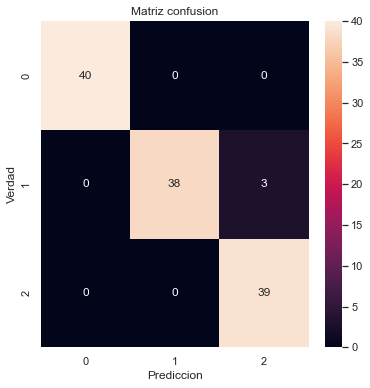


 ----- Confusion Matrix for Test -----



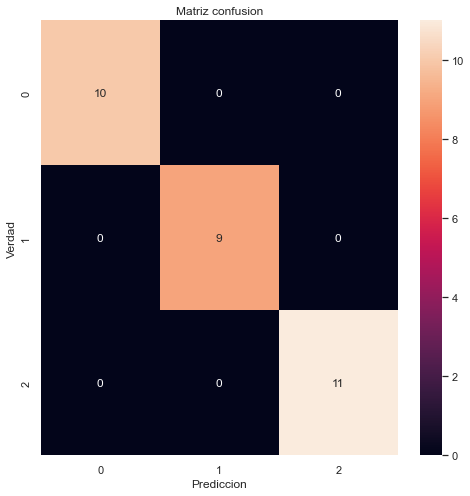

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [25]:
train_classification_model(logreg, X_c, y_c)

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [27]:
help(train_classification_model)

Help on function train_classification_model in module __main__:

train_classification_model(model, X, y)
    This function fit a model, and return evaluation of the model based on RMSE, MAE and R2 score.
    
    Parameters:
        model: Model that will be trained
        X: DataFrame for train the model
        y: Target
    Return:
        Results of the evaluations the model



## 10. Calculate and print the precision score for both the training and the testing set.

## 11. Calculate and print the recall score for both the training and the testing set.

## 12. Calculate and print the F1 score for both the training and the testing set.

## 13. Generate confusion matrices for both the training and the testing set.

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.